# Scales, Axes, and Legends

Visual encoding &ndash; mapping data to visual variables such as position, size, shape, or color &ndash; is the beating heart of data visualization. The workhorse that actually performs this mapping is the *scale*: a function that takes a data value as input (the scale *domain*) and returns a visual value, such as a pixel position or RGB color, as output (the scale *range*).  Of course, a visualization is useless if no one can figure out what it conveys! In addition to graphical marks, a chart needs reference elements, or *guides*, that allow readers to decode the graphic. Guides such as *axes* (which visualize scales with spatial ranges) and *legends* (which visualize scales with color, size, or shape ranges), are the unsung heroes of effective data visualization!

In this notebook, we will explore the options Altair provides to support customized designs of scale mappings, axes, and legends, using a running example about the effectiveness of antibiotic drugs.

_This notebook is part of the [data visualization curriculum](https://github.com/uwdata/visualization-curriculum)._

In [1]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

## Antibiotics Data

After World War II, antibiotics were considered "wonder drugs", as they were an easy remedy for what had been intractable ailments. To learn which drug worked most effectively for which bacterial infection, performance of the three most popular antibiotics on 16 bacteria were gathered.

We will be using an antibiotics dataset from the [vega-datasets collection](https://github.com/vega/vega-datasets). In the examples below, we will pass the URL directly to Altair:

In [3]:
from vega_datasets import data
antibiotics = data.burtin.url

We can first load the data with Pandas to view the dataset in its entirety and get acquainted with the available fields:

In [4]:
pd.read_json(antibiotics)

,Bacteria,Genus,Gram_Staining,Neomycin,Penicillin,Streptomycin
0,Aerobacter aerogenes,other,negative,1.600,870.000,1.00
1,Bacillus anthracis,other,positive,0.007,0.001,0.01
2,Brucella abortus,other,negative,0.020,1.000,2.00
3,Diplococcus pneumoniae,other,positive,10.000,0.005,11.00
4,Escherichia coli,other,negative,0.100,100.000,0.40
5,Klebsiella pneumoniae,other,negative,1.000,850.000,1.20
6,Mycobacterium tuberculosis,other,negative,2.000,800.000,5.00
7,Proteus vulgaris,other,negative,0.100,3.000,0.10
8,Pseudomonas aeruginosa,other,negative,0.400,850.000,2.00
9,Salmonella (Eberthella) typhosa,Salmonella,negative,0.008,1.000,0.40


The numeric values in the table indicate the [minimum inhibitory concentration (MIC)](https://en.wikipedia.org/wiki/Minimum_inhibitory_concentration), a measure of the effectiveness of the antibiotic, which represents the concentration of antibiotic (in micrograms per milliliter) required to prevent growth in vitro. The reaction of the bacteria to a procedure called [Gram staining](https://en.wikipedia.org/wiki/Gram_stain) is described by the nominal field `Gram_Staining`. Bacteria that turn dark blue or violet are Gram-positive. Otherwise, they are Gram-negative.

As we examine different visualizations of this dataset, ask yourself: What might we learn about the relative effectiveness of the antibiotics? What might we learn about the bacterial species based on their antibiotic response?

## Configuring Scales and Axes

### Plotting Antibiotic Resistance: Adjusting the Scale Type

Let's start by looking at a simple dot plot of the MIC for Neomycin.

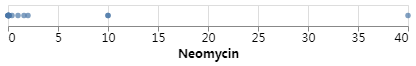

In [4]:
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q')
)

_We can see that the MIC values span orders of magnitude: most points to cluster on the left, with a few large outliers to the right._

By default Altair uses a `linear` mapping between the domain values (MIC) and the range values (pixels). To get a better overview of the data, we can apply a different scale transformation.

To change the scale type, we'll set the `scale` attribute, using the `alt.Scale` method and `type` parameter.

Here's the result of using a square root (`sqrt`) scale type. Distances in the pixel range now correspond to the square root of distances in the data domain.

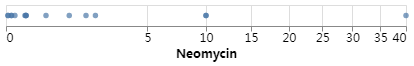

In [5]:
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          scale=alt.Scale(type='sqrt'))
)

_The points on the left are now better differentiated, but we still see some heavy skew._

Let's try using a [logarithmic scale](https://en.wikipedia.org/wiki/Logarithmic_scale) (`log`) instead:

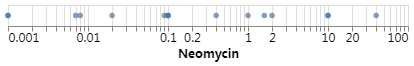

In [6]:
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          scale=alt.Scale(type='log'))
)

_Now the data is much more evenly distributed and we can see the very large differences in concentrations required for different bacteria._

In a standard linear scale, a visual (pixel) distance of 10 units might correspond to an *addition* of 10 units in the data domain. A logarithmic transform maps between multiplication and addition, such that `log(u) + log(v) = log(u*v)`. As a result, in a logarithmic scale, a visual distance of 10 units instead corresponds to *multiplication* by 10 units in the data domain, assuming a base 10 logarithm. The `log` scale above defaults to using the logarithm base 10, but we can adjust this by providing a `base` parameter to the scale.

### Styling an Axis

Lower dosages indicate higher effectiveness. However, some people may expect values that are "better" to be "up and to the right" within a chart. If we want to cater to this convention, we can reverse the axis to encode "effectiveness" as a reversed MIC scale.

To do this, we can set the encoding `sort` property to `'descending'`:

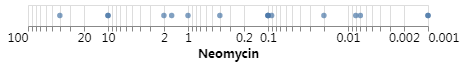

In [7]:
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log'))
)

_Unfortunately the axis is starting to get a bit confusing: we're plotting data on a logarithmic scale, in the reverse direction, and without a clear indication of what our units are!_

Let's add a more informative axis title: we'll use the `title` property of the encoding to provide the desired title text:

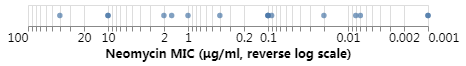

In [8]:
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log'),
          title='Neomycin MIC (μg/ml, reverse log scale)')
)

Much better!

By default, Altair places the x-axis along the bottom of the chart. To change these defaults, we can add an `axis` attribute with `orient='top'`:

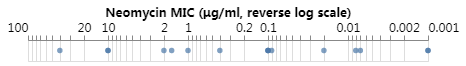

In [9]:
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log'),
          axis=alt.Axis(orient='top'),
          title='Neomycin MIC (μg/ml, reverse log scale)')
)

Similarly, the y-axis defaults to a `'left'` orientation, but can be set to `'right'`.

### Comparing Antibiotics: Adjusting Grid Lines, Tick Counts, and Sizing

_How does neomycin compare to other antibiotics, such as streptomycin and penicillin?_

To start answering this question, we can create scatter plots, adding a y-axis encoding for another antibiotic that mirrors the design of our x-axis for neomycin.

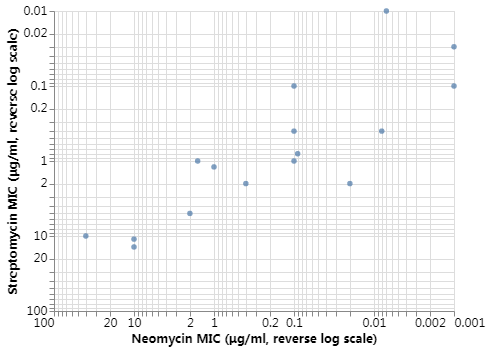

In [10]:
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log'),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Streptomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log'),
          title='Streptomycin MIC (μg/ml, reverse log scale)')
)

_We can see that neomycin and streptomycin appear highly correlated, as the bacterial strains respond similarly to both antibiotics._

Let's move on and compare neomycin with penicillin:

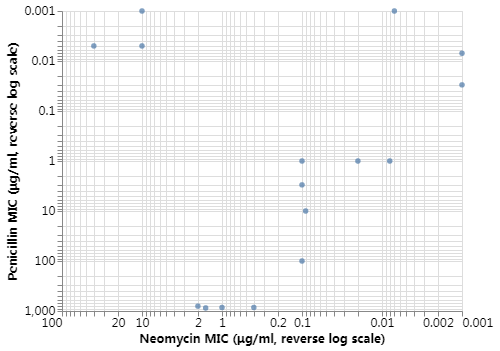

In [11]:
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log'),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log'),
          title='Penicillin MIC (μg/ml, reverse log scale)')
)

_Now we see a more differentiated response: some bacteria respond well to neomycin but not penicillin, and vice versa!_

While this plot is useful, we can make it better. The x and y axes use the same units, but have different extents (the chart width is larger than the height) and different domains (0.001 to 100 for the x-axis, and 0.001 to 1,000 for the y-axis).

Let's equalize the axes: we can add explicit `width` and `height` settings for the chart, and specify matching domains  using the scale `domain` property.

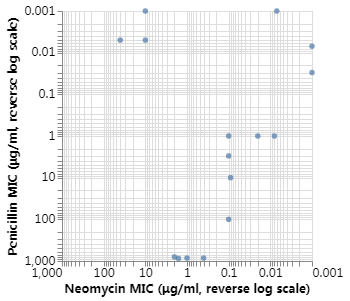

In [13]:
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          title='Penicillin MIC (μg/ml, reverse log scale)')
).properties(width=250, height=250)

_The resulting plot is more balanced, and less prone to subtle misinterpretations!_

However, the grid lines are now rather dense. If we want to remove grid lines altogether, we can add `grid=False` to the `axis` attribute. But what if we instead want to reduce the number of tick marks, for example only including grid lines for each order of magnitude?

To change the number of ticks, we can specify a target `tickCount` property for an `Axis` object. The `tickCount` is treated as a *suggestion* to Altair, to be considered alongside other aspects such as using nice, human-friendly intervals. We may not get *exactly* the number of tick marks we request, but we should get something close.

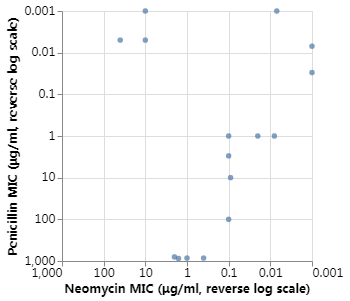

In [14]:
alt.Chart(antibiotics).mark_circle().encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)')
).properties(width=250, height=250)

By setting the `tickCount` to 5, we have the desired effect.

Our scatter plot points feel a bit small. Let's change the default size by setting the `size` property of the circle mark. This size value is the *area* of the mark in pixels.

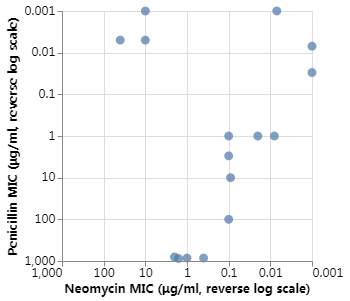

In [15]:
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'), 
).properties(width=250, height=250)

Here we've set the circle mark area to 80 pixels. _Further adjust the value as you see fit!_

## Configuring Color Legends

### Color by Gram Staining

_Above we saw that neomycin is more effective for some bacteria, while penicillin is more effective for others. But how can we tell which antibiotic to use if we don't know the specific species of bacteria? Gram staining serves as a diagnostic for discriminating classes of bacteria!_

Let's encode `Gram_Staining` on the `color` channel as a nominal data type:

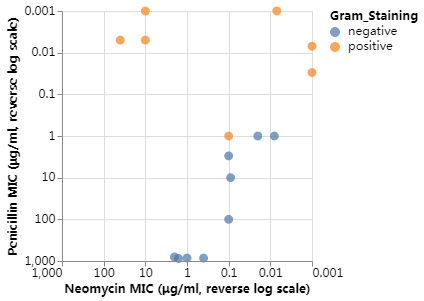

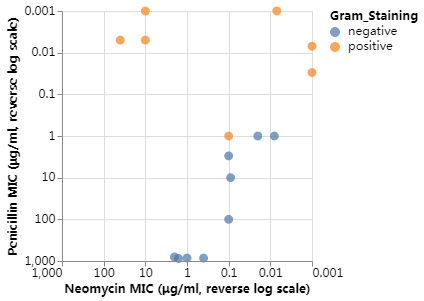

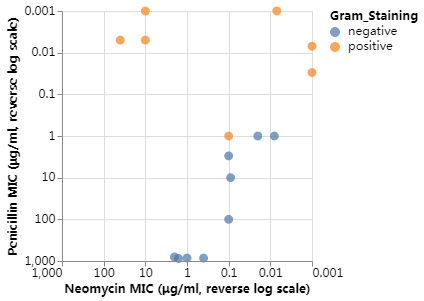

In [19]:
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Gram_Staining:N')
).properties(width=250, height=250)

_We can see that Gram-positive bacteria seem most susceptible to penicillin, whereas neomycin is more effective for Gram-negative bacteria!_

The color scheme above was automatically chosen to provide perceptually-distinguishable colors for nominal (equal or not equal) comparisons. However, we might wish to customize the colors used. In this case, Gram staining results in [distinctive physical colorings: pink for Gram-negative, purple for Gram-positive](https://en.wikipedia.org/wiki/Gram_stain#/media/File:Gram_stain_01.jpg).

Let's use those colors by specifying an explicit scale mapping from the data `domain` to the color `range`:

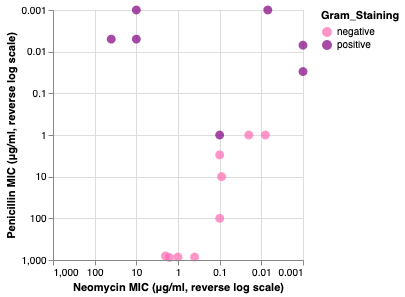

In [16]:
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Gram_Staining:N',
          scale=alt.Scale(domain=['negative', 'positive'], range=['hotpink', 'purple'])
    )
).properties(width=250, height=250)

By default legends are placed on the right side of the chart. Similar to axes, we can change the legend orientation using the `orient` parameter:

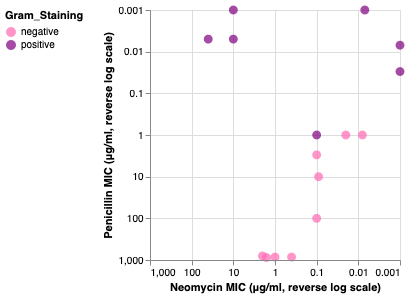

In [17]:
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Gram_Staining:N',
          scale=alt.Scale(domain=['negative', 'positive'], range=['hotpink', 'purple']),
          legend=alt.Legend(orient='left')
    )
).properties(width=250, height=250)

We can also remove a legend entirely by specifying `legend=None`:

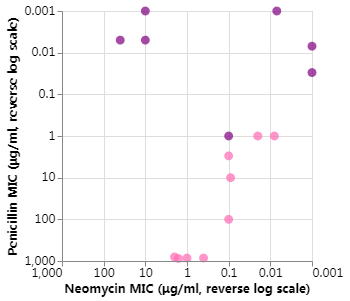

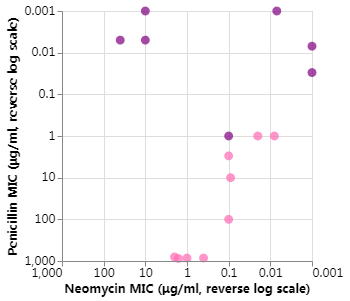

In [21]:
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Gram_Staining:N',
          scale=alt.Scale(domain=['negative', 'positive'], range=['hotpink', 'purple']),
          legend=None
    )
).properties(width=250, height=250)

### Color by Species

_So far we've considered the effectiveness of antibiotics. Let's turn around and ask a different question: what might antibiotic response teach us about the different species of bacteria?_

To start, let's encode `Bacteria` (a nominal data field) using the `color` channel:

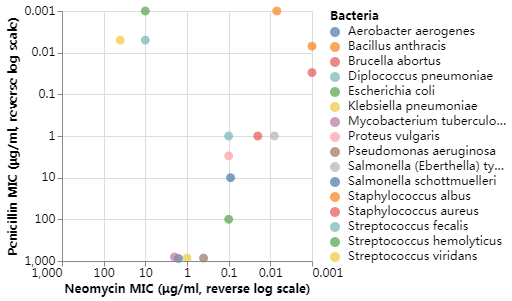

In [22]:
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Bacteria:N')
).properties(width=250, height=250)

_The result is a bit of a mess!_ There are enough unique bacteria that Altair starts repeating colors from its default 10-color palette for nominal values.

To use custom colors, we can update the color encoding `scale` property. One option is to provide explicit scale `domain` and `range` values to indicate the precise color mappings per value, as we did above for Gram staining. Another option is to use an alternative color scheme. Altair includes a variety of built-in color schemes. For a complete list, see the [Vega color scheme documentation](https://vega.github.io/vega/docs/schemes/#reference).

Let's try switching to a built-in 20-color scheme, `tableau20`, and set that using the scale `scheme` property.

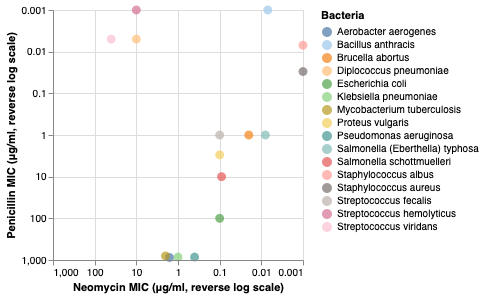

In [20]:
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Bacteria:N',
          scale=alt.Scale(scheme='tableau20'))
).properties(width=250, height=250)

_We now have a unique color for each bacteria, but the chart is still a mess. Among other issues, the encoding takes no account of bacteria that belong to the same genus. In the chart above, the two different Salmonella strains have very different hues (teal and pink), despite being biological cousins._

To try a different scheme, we can also change the data type from nominal to ordinal. The default ordinal scheme uses blue shades, ramping from light to dark:

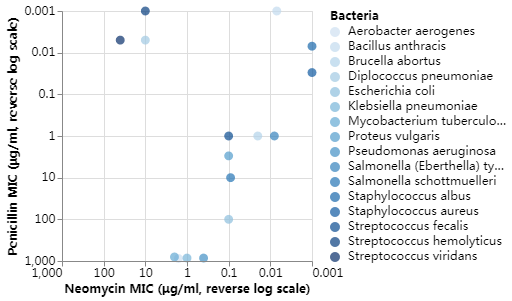

In [23]:
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Bacteria:O')
).properties(width=250, height=250)

_Some of those blue shades may be hard to distinguish._

For more differentiated colors, we can experiment with alternatives to the default `blues` color scheme. The `viridis` scheme ramps through both hue and luminance:

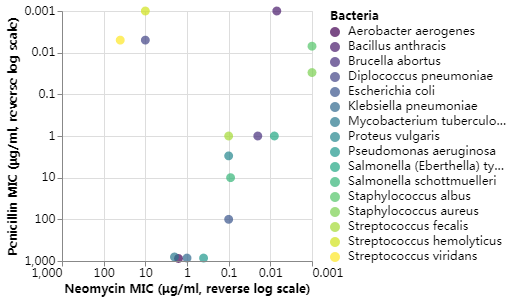

In [24]:
alt.Chart(antibiotics).mark_circle(size=80).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Bacteria:O',
          scale=alt.Scale(scheme='viridis'))
).properties(width=250, height=250)

_Bacteria from the same genus now have more similar colors than before, but the chart still remains confusing. There are many colors, they are hard to look up in the legend accurately, and two bacteria may have similar colors but different genus._

### Color by Genus

Let's try to color by genus instead of bacteria. To do so, we will add a `calculate` transform that splits up the bacteria name on space characters and takes the first word in the resulting array. We can then encode the resulting `Genus` field using the `tableau20` color scheme.

(Note that the antibiotics dataset includes a pre-calculated `Genus` field, but we will ignore it here in order to further explore Altair's data transformations.)

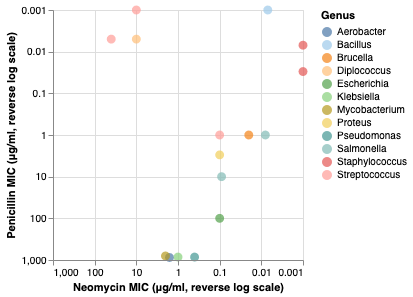

In [23]:
alt.Chart(antibiotics).mark_circle(size=80).transform_calculate(
    Genus='split(datum.Bacteria, " ")[0]'
).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Genus:N',
          scale=alt.Scale(scheme='tableau20'))
).properties(width=250, height=250)

_Hmm... While the data are better segregated by genus, this cacapohony of colors doesn't seem particularly useful._

_If we look at some of the previous charts carefully, we can see that only a handful of bacteria have a genus shared with another bacteria: Salmonella, Staphylococcus, and Streptococcus. To focus our comparison, we might add colors only for these repeated genus values._

Let's add another `calculate` transform that takes a genus name, keeps it if it is one of the repeated values, and otherwise uses the string `"Other"`.

In addition, we can add custom color encodings using explicit `domain` and `range` arrays for the color encoding `scale`.


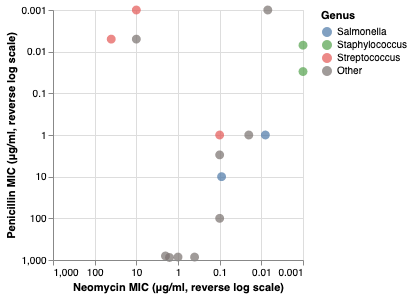

In [24]:
alt.Chart(antibiotics).mark_circle(size=80).transform_calculate(
  Split='split(datum.Bacteria, " ")[0]'
).transform_calculate(
  Genus='indexof(["Salmonella", "Staphylococcus", "Streptococcus"], datum.Split) >= 0 ? datum.Split : "Other"'
).encode(
    alt.X('Neomycin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Neomycin MIC (μg/ml, reverse log scale)'),
    alt.Y('Penicillin:Q',
          sort='descending',
          scale=alt.Scale(type='log', domain=[0.001, 1000]),
          axis=alt.Axis(tickCount=5),
          title='Penicillin MIC (μg/ml, reverse log scale)'),
    alt.Color('Genus:N',
          scale=alt.Scale(
            domain=['Salmonella', 'Staphylococcus', 'Streptococcus', 'Other'],
            range=['rgb(76,120,168)', 'rgb(84,162,75)', 'rgb(228,87,86)', 'rgb(121,112,110)']
          ))
).properties(width=250, height=250)

_We now have a much more revealing plot, made possible by customizations to the axes and legend. Take a moment to examine the plot above. Notice any surprising groupings?_

_The upper-left region has a cluster of red Streptococcus bacteria, but with a grey Other bacteria alongside them. Meanwhile, towards the middle-right we see another red Streptococcus placed far away from it's "cousins". Might we expect bacteria from the same genus (and thus presumably more genetically similar) to be grouped closer together?_

As it so happens, the underlying dataset actually contains errors. The dataset reflects the species designations used in the early 1950s. However, the scientific consensus has since been overturned. That gray point in the upper-left? It's now considered a Streptococcus! That red point towards the middle-right? It's no longer considered a Streptococcus!

Of course, on its own, this dataset doesn't fully justify these reclassifications. Nevertheless, the data contain valuable biological clues that went overlooked for decades! Visualization, when used by an appropriately skilled and inquisitive viewer, can be a powerful tool for discovery.

This example also reinforces an important lesson: **_always be skeptical of your data!_**

### Color by Antibiotic Response

We might also use the `color` channel to encode quantitative values. Though keep in mind that typically color is not as effective for conveying quantities as position or size encodings!

Here is a basic heatmap of penicillin MIC values for each bacteria. We'll use a `rect` mark and sort the bacteria by descending MIC values (from most to least resistant):

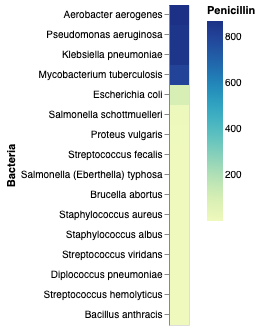

In [25]:
alt.Chart(antibiotics).mark_rect().encode(
    alt.Y('Bacteria:N',
      sort=alt.EncodingSortField(field='Penicillin', op='max', order='descending')
    ),
    alt.Color('Penicillin:Q')
)

We can further improve this chart by combining features we've seen thus far: a log-transformed scale, a change of axis orientation, a custom color scheme (`plasma`), tick count adjustment, and custom title text. We'll also exercise configuration options to adjust the axis title placement and legend title alignment.

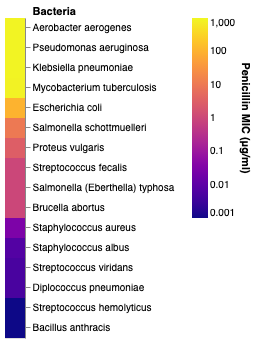

In [26]:
alt.Chart(antibiotics).mark_rect().encode(
    alt.Y('Bacteria:N',
      sort=alt.EncodingSortField(field='Penicillin', op='max', order='descending'),
      axis=alt.Axis(
        orient='right',     # orient axis on right side of chart
        titleX=7,           # set x-position to 7 pixels right of chart
        titleY=-2,          # set y-position to 2 pixels above chart
        titleAlign='left',  # use left-aligned text
        titleAngle=0        # undo default title rotation
      )
    ),
    alt.Color('Penicillin:Q',
      scale=alt.Scale(type='log', scheme='plasma', nice=True),
      legend=alt.Legend(titleOrient='right', tickCount=5),
      title='Penicillin MIC (μg/ml)'
    )
)

Alternatively, we can remove the axis title altogether, and use the top-level `title` property to add a title for the entire chart:

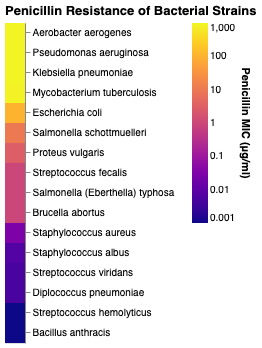

In [27]:
alt.Chart(antibiotics, title='Penicillin Resistance of Bacterial Strains').mark_rect().encode(
    alt.Y('Bacteria:N',
      sort=alt.EncodingSortField(field='Penicillin', op='max', order='descending'),
      axis=alt.Axis(orient='right', title=None)
    ),
    alt.Color('Penicillin:Q',
      scale=alt.Scale(type='log', scheme='plasma', nice=True),
      legend=alt.Legend(titleOrient='right', tickCount=5),
      title='Penicillin MIC (μg/ml)'
    )
).configure_title(
  anchor='start', # anchor and left-align title
  offset=5        # set title offset from chart
)

## Summary

Integrating what we've learned across the notebooks so far about encodings, data transforms, and customization, you should now be prepared to make a wide variety of statistical graphics. Now you can put Altair into everyday use for exploring and communicating data!

Interested in learning more about this topic?

- Start with the [Altair Customizing Visualizations documentation](https://altair-viz.github.io/user_guide/customization.html).
- For a complementary discussion of scale mappings, see ["Introducing d3-scale"](https://medium.com/@mbostock/introducing-d3-scale-61980c51545f).
- For a more in-depth exploration of all the ways axes and legends can be styled by the underlying Vega library (which powers Altair and Vega-Lite), see ["A Guide to Guides: Axes & Legends in Vega"](https://beta.observablehq.com/@jheer/a-guide-to-guides-axes-legends-in-vega).
- For a fascinating history of the antibiotics dataset, see [Wainer &amp; Lysen's "That's Funny..."](https://www.americanscientist.org/article/thats-funny) in the _American Scientist_.